In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'pet',
    'heart',
    'hi'
]

data = np.concatenate([
    np.load('dataset/seq_pet_1643785507.npy'),
    np.load('dataset/seq_heart_1643785507.npy'),
    np.load('dataset/seq_hi_1643785507.npy')
], axis=0)

data.shape

(3118, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(3118, 30, 99)
(3118,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(3118, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2806, 30, 99) (2806, 3)
(312, 30, 99) (312, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=300,
    callbacks=[
        ModelCheckpoint('models/model2_1.0.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/300
87/88 [============================>.] - ETA: 0s - loss: 13.1667 - acc: 0.5930
Epoch 00001: val_acc improved from -inf to 0.74359, saving model to models\model2_1.0.h5
88/88 [==============================] - 2s 23ms/step - loss: 13.1281 - acc: 0.5944 - val_loss: 3.7664 - val_acc: 0.7436
Epoch 2/300
88/88 [==============================] - ETA: 0s - loss: 9.0317 - acc: 0.7562
Epoch 00002: val_acc did not improve from 0.74359
88/88 [==============================] - 2s 26ms/step - loss: 9.0317 - acc: 0.7562 - val_loss: 15.2884 - val_acc: 0.6571
Epoch 3/300
88/88 [==============================] - ETA: 0s - loss: 7.6588 - acc: 0.7267
Epoch 00003: val_acc improved from 0.74359 to 0.92308, saving model to models\model2_1.0.h5
88/88 [==============================] - 2s 27ms/step - loss: 7.6588 - acc: 0.7267 - val_loss: 1.6521 - val_acc: 0.9231
Epoch 4/300
88/88 [==============================] - ETA: 0s - loss: 4.8834 - acc: 0.7801
Epoch 00004: val_acc did not improve from 0.92

Epoch 32/300
87/88 [============================>.] - ETA: 0s - loss: 0.1470 - acc: 0.9903
Epoch 00032: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 0.1687 - acc: 0.9897 - val_loss: 2.5166 - val_acc: 0.8942
Epoch 33/300
88/88 [==============================] - ETA: 0s - loss: 0.2770 - acc: 0.9840
Epoch 00033: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.2770 - acc: 0.9840 - val_loss: 0.0968 - val_acc: 0.9904
Epoch 34/300
88/88 [==============================] - ETA: 0s - loss: 0.2720 - acc: 0.9840
Epoch 00034: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.2720 - acc: 0.9840 - val_loss: 0.2062 - val_acc: 0.9840
Epoch 35/300
88/88 [==============================] - ETA: 0s - loss: 27.4911 - acc: 0.7217
Epoch 00035: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 27.4911 - acc

86/88 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9975
Epoch 00063: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0559 - acc: 0.9975 - val_loss: 0.0515 - val_acc: 0.9968
Epoch 64/300
88/88 [==============================] - ETA: 0s - loss: 0.0500 - acc: 0.9971
Epoch 00064: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0500 - acc: 0.9971 - val_loss: 0.0477 - val_acc: 0.9968
Epoch 65/300
86/88 [============================>.] - ETA: 0s - loss: 0.0434 - acc: 0.9985
Epoch 00065: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0455 - acc: 0.9982 - val_loss: 0.0436 - val_acc: 0.9968
Epoch 66/300
87/88 [============================>.] - ETA: 0s - loss: 0.0402 - acc: 0.9978
Epoch 00066: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0400 - acc: 0.9979 - val_

Epoch 94/300
87/88 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9993
Epoch 00094: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0153 - acc: 0.9993 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 95/300
86/88 [============================>.] - ETA: 0s - loss: 0.0140 - acc: 0.9993
Epoch 00095: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0139 - acc: 0.9993 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 96/300
87/88 [============================>.] - ETA: 0s - loss: 0.0128 - acc: 0.9996
Epoch 00096: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0128 - acc: 0.9996 - val_loss: 0.0154 - val_acc: 1.0000
Epoch 97/300
88/88 [==============================] - ETA: 0s - loss: 0.0120 - acc: 0.9996
Epoch 00097: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0120 - acc: 

Epoch 125/300
87/88 [============================>.] - ETA: 0s - loss: 0.0038 - acc: 0.9996
Epoch 00125: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 126/300
88/88 [==============================] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00126: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 127/300
86/88 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00127: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 128/300
87/88 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 1.0000
Epoch 00128: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 0.0035 - a

88/88 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00156: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 157/300
88/88 [==============================] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00157: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 158/300
87/88 [============================>.] - ETA: 0s - loss: 0.0014 - acc: 1.0000 - ETA
Epoch 00158: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 159/300
87/88 [============================>.] - ETA: 0s - loss: 0.0012 - acc: 1.0000
Epoch 00159: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 27ms/step - loss: 0.0012 - acc: 1.00

85/88 [===========================>..] - ETA: 0s - loss: 6.9878e-04 - acc: 1.0000
Epoch 00186: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 21ms/step - loss: 6.8788e-04 - acc: 1.0000 - val_loss: 8.1081e-04 - val_acc: 1.0000
Epoch 187/300
87/88 [============================>.] - ETA: 0s - loss: 6.4896e-04 - acc: 1.0000
Epoch 00187: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 21ms/step - loss: 6.4458e-04 - acc: 1.0000 - val_loss: 7.6473e-04 - val_acc: 1.0000
Epoch 188/300
86/88 [============================>.] - ETA: 0s - loss: 5.9048e-04 - acc: 1.0000
Epoch 00188: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 25ms/step - loss: 5.8215e-04 - acc: 1.0000 - val_loss: 7.1723e-04 - val_acc: 1.0000
Epoch 189/300
88/88 [==============================] - ETA: 0s - loss: 5.3197e-04 - acc: 1.0000
Epoch 00189: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 22

Epoch 216/300
88/88 [==============================] - ETA: 0s - loss: 2.3268e-04 - acc: 1.0000
Epoch 00216: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 2.3268e-04 - acc: 1.0000 - val_loss: 3.5790e-04 - val_acc: 1.0000
Epoch 217/300
86/88 [============================>.] - ETA: 0s - loss: 2.2691e-04 - acc: 1.0000
Epoch 00217: val_acc did not improve from 1.00000

Epoch 00217: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
88/88 [==============================] - 2s 26ms/step - loss: 2.2561e-04 - acc: 1.0000 - val_loss: 2.4164e-04 - val_acc: 1.0000
Epoch 218/300
88/88 [==============================] - ETA: 0s - loss: 2.1073e-04 - acc: 1.0000
Epoch 00218: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 2.1073e-04 - acc: 1.0000 - val_loss: 2.5968e-04 - val_acc: 1.0000
Epoch 219/300
88/88 [==============================] - ETA: 0s - loss: 2.0472e-04 - acc: 1.0000
Ep

87/88 [============================>.] - ETA: 0s - loss: 1.1040e-04 - acc: 1.0000
Epoch 00245: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0956e-04 - acc: 1.0000 - val_loss: 1.2765e-04 - val_acc: 1.0000
Epoch 246/300
86/88 [============================>.] - ETA: 0s - loss: 1.0240e-04 - acc: 1.0000
Epoch 00246: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0631e-04 - acc: 1.0000 - val_loss: 1.2076e-04 - val_acc: 1.0000
Epoch 247/300
87/88 [============================>.] - ETA: 0s - loss: 1.0543e-04 - acc: 1.0000
Epoch 00247: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0487e-04 - acc: 1.0000 - val_loss: 1.1757e-04 - val_acc: 1.0000
Epoch 248/300
88/88 [==============================] - ETA: 0s - loss: 1.0174e-04 - acc: 1.0000
Epoch 00248: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26

86/88 [============================>.] - ETA: 0s - loss: 9.9665e-05 - acc: 1.0000- ETA: 0s - loss: 7.4157e-05 
Epoch 00274: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0381e-04 - acc: 1.0000 - val_loss: 1.1333e-04 - val_acc: 1.0000
Epoch 275/300
86/88 [============================>.] - ETA: 0s - loss: 1.0464e-04 - acc: 1.0000
Epoch 00275: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0316e-04 - acc: 1.0000 - val_loss: 1.1222e-04 - val_acc: 1.0000
Epoch 276/300
88/88 [==============================] - ETA: 0s - loss: 1.0162e-04 - acc: 1.0000- ETA: 0s - loss: 1.0830e-04 - acc:  - ETA: 0s - loss: 1.0258e-04 - acc: 1.000
Epoch 00276: val_acc did not improve from 1.00000
88/88 [==============================] - 2s 26ms/step - loss: 1.0162e-04 - acc: 1.0000 - val_loss: 1.1044e-04 - val_acc: 1.0000
Epoch 277/300
87/88 [============================>.] - ETA: 0s - loss: 1.0107e-04 - a

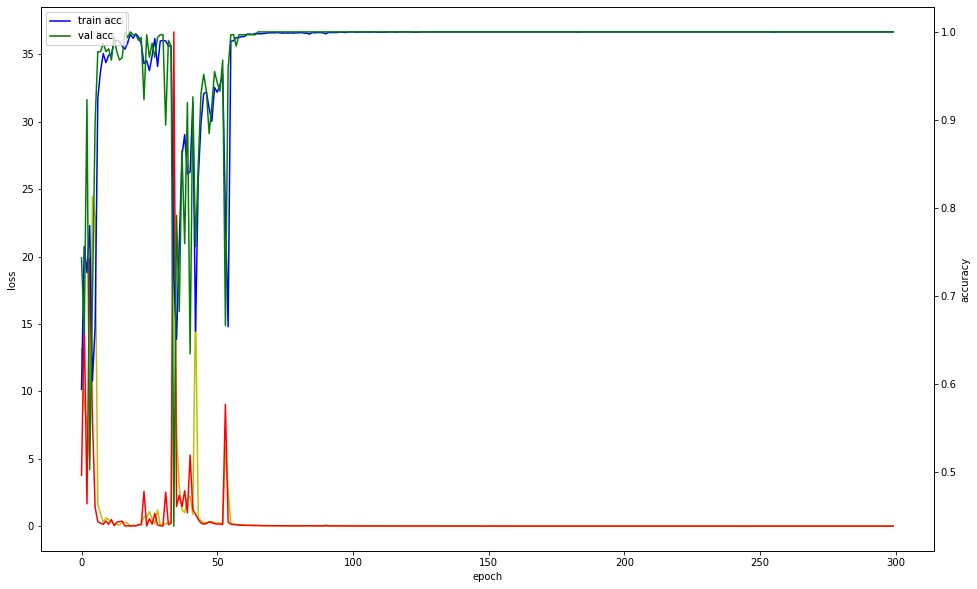

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2_1.0.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[195,   0],
        [  0, 117]],

       [[205,   0],
        [  0, 107]],

       [[224,   0],
        [  0,  88]]], dtype=int64)